96583


/tmp/ipykernel_51954/2502302966.py:41: RuntimeWarning: divide by zero encountered in true_divide
  freq.append( 1e9 / (df['timestamp'][i] - df['timestamp'][i-1]) )


90696
count    9.658200e+04
mean              inf
std               NaN
min      5.590129e-04
25%      9.900990e+01
50%      9.900990e+01
75%      1.000000e+02
max               inf
Name: frequency, dtype: float64


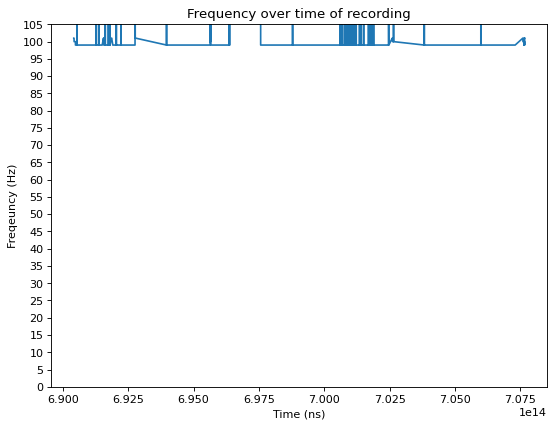

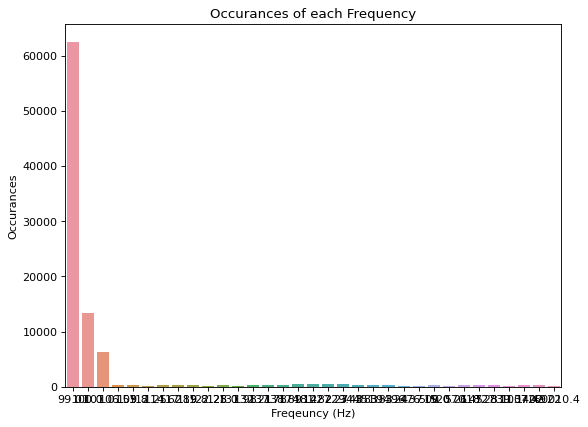

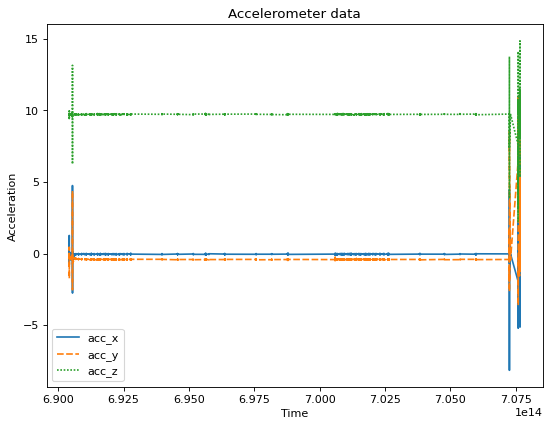

In [1]:
import pandas as pd
from collections import Counter
import os
import seaborn as sns
import matplotlib.pyplot as plt
from datetime import timedelta
import numpy as np
from scipy import stats

data_dir = 'data/battery-exp9'
min_occurances = 0

df = pd.DataFrame()
for file in os.listdir(data_dir):
    if file.startswith('Session'):
        with open(f'{data_dir}/{file}') as f:
            starttime_millis = int(f.readline().rstrip()[17:])
        session = pd.read_csv(f'{data_dir}/{file}', skiprows=1)
    else:
        tmp = pd.read_csv(f'{data_dir}/{file}', skiprows=1)
        df = pd.concat([df, tmp], ignore_index=True)
df = df.sort_values(by=['timestamp'], ignore_index=True)

print(len(df))
# get readable time (delta from start time)
real_times = []
for time_millis in df['real time']:
    delta = (time_millis - starttime_millis) # convert to seconds
    real_times.append(str(timedelta(microseconds=delta)))
df['time (s)'] = real_times

# Get offset to real time

# get frequency at each sample
freq = []
for i, timestamp in enumerate(df['timestamp']):
    if i == 0:
        freq.append(np.nan)
        continue
    # get time since last sample, convert to Hz
    freq.append( 1e9 / (df['timestamp'][i] - df['timestamp'][i-1]) )
df['frequency'] = freq

df_to_plot = df.groupby('frequency').filter(lambda x: len(x) > min_occurances)
print(len(df_to_plot))
# count occurences
counts = {round(x, 2): y for (x,y) in Counter(freq).items() if y > min_occurances}
    
print(df['frequency'].describe())

plt.figure(figsize=(8, 6), dpi=80)
plt.title('Frequency over time of recording')
sns.lineplot(x=df_to_plot['timestamp'], y=df_to_plot['frequency'])
# plt.ylim(0,100)
# plt.yticks(range(0,110,5))
plt.xlabel('Time (ns)')
plt.ylabel('Freqeuncy (Hz)')
plt.show()
plt.close()

plt.figure(figsize=(8, 6), dpi=80)
plt.title('Occurances of each Frequency')
sns.barplot(x=list(counts.keys()), y=list(counts.values()))
plt.xlabel('Freqeuncy (Hz)')
plt.ylabel('Occurances')
plt.show()
plt.close()

plt.figure(figsize=(8, 6), dpi=80)
plt.title('Accelerometer data')
df_to_lineplot = df.set_index('timestamp')[['acc_x', 'acc_y', 'acc_z']]

sns.lineplot(data=df_to_lineplot)
plt.xlabel('Time')
plt.ylabel('Acceleration')
plt.show()
plt.close()

In [ ]:
start = []
stop = []
for i in range(len(session)):
    for j in range(len(df)):
        start.append(abs(session['Start Time'][i] - df['real time'][j]))
        stop.append(abs(session['Stop Time'][i] - df['real time'][j]))
start_idx = start.index(min(start))
stop_idx = stop.index(min(stop))

print(df[df.index == start_idx])
print(df[df.index == stop_idx])


In [ ]:
# time deltas

import pandas as pd
from collections import Counter
import os
import seaborn as sns
import matplotlib.pyplot as plt
from datetime import timedelta
import numpy as np
from scipy import stats

data_dir = 'data/battery-life-exp5'
min_occurances = 0

df = pd.DataFrame()
for file in os.listdir(data_dir):
    if file.startswith('Session'):
        with open(f'{data_dir}/{file}') as f:
            starttime_millis = int(f.readline().rstrip()[17:])
        session = pd.read_csv(f'{data_dir}/{file}', skiprows=1)
    else:
        tmp = pd.read_csv(f'{data_dir}/{file}', skiprows=1)
        df = pd.concat([df, tmp], ignore_index=True)
df = df.sort_values(by=['timestamp'], ignore_index=True)

print(len(df))
# get readable time (delta from start time)
real_times = []
for time_millis in df['real time']:
    delta = (time_millis - starttime_millis)
    real_times.append(str(timedelta(microseconds=delta)))
df['time (s)'] = real_times

# Get offset to real time

# get delta at each sample
delta = []
for i, timestamp in enumerate(df['timestamp']):
    if i == 0:
        delta.append(np.nan)
        continue
    # get time since last sample, convert to Hz
    delta.append((df['timestamp'][i] - df['timestamp'][i-1]) / 1e9)


# df['frequency'] = freq
df['delta'] = delta

print(df['delta'].describe())

import plotly.express as px

fig = px.line(df, x='timestamp', y='delta', title='Time delta', 
                labels={'timestamp': 'Time (ns)', 
                        'delta': 'Time delta (s)'})
fig.show(renderer='browser')